### Library loading

In [1]:
import os

# for handling dataframe
import re
import csv
import pandas as pd
import numpy as np

# for BOW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# for wordcloud
import matplotlib.pylab as plt
from wordcloud import WordCloud
from PIL import Image

work_dir = 'D:/Document/project/HYStudy/scripts'
os.chdir(work_dir)

### Data loading

In [2]:
raw_text = pd.read_csv('[HYStudy 17th] ex_data.csv', encoding='utf-8', names=['content'])
raw_text.head()

,content
0,대리점 폰 사려 꼭알아가야할점 그런것들있나 제 지금 gpro2 쓰 넘 약정 끝나 그...
1,위약4 질문 g5 제 ㅎㅇ 개통 599유 조건 그 유지 끝내 나 폰 바꾸 되 저 청...
2,가격대 중고가20만원 포함 추천 이어폰 어느정도 후보군 추려 er4 ue900 트파...
3,잠깐 기기 위약금 나오 제 g5 새기 생기 통신사 skt 유심 하려 보 g5새 lg...
4,g5 진열 되 상태 폰 못쓸거같은데 예 도색 벗기 요


### Make Corpus

In [3]:
corpus = np.array(raw_text['content'])
print(len(corpus))
print(corpus[0:3])

raw_text.tail()

8349
[ '대리점 폰 사려 꼭알아가야할점 그런것들있나 제 지금 gpro2 쓰 넘 약정 끝나 그 폰 발열 하구 베터리 따르 엇보 와이파이 접촉 불량때문 와이파이 켜 않 이참 폰 바꾸 하 노트5 g5 생각 g5 평이 너무 안좋더 노트5생 요즘 노트5 대리점 구입 얼마인가 kt쓰고있 기기 하 생각 폰 법 바뀌 나 구매 알아야할점 그런것들있나 네이버 치 노트5 정도 하 것 맞 요즘 69했을경우 음 제 대충 보기 요금 따르 공시 바뀌 요금 비싼요금제 시작 한달 쓰 바 바꾸 되 이런것들 추가적 있 대리점 요금 구매 혜택 있 블루스 그런곳 바꾸 정보 주세 사 당하 하 흑'
 '위약4 질문 g5 제 ㅎㅇ 개통 599유 조건 그 유지 끝내 나 폰 바꾸 되 저 청구 위약4 3 ㅎㅇ완납 4 금액 550 사용 제외 730 이 되 ㅎㅇ 개통 g5 사용 다시 번이했 경우 위 금액만큼 제 물 맞 문의 드립 다'
 '가격대 중고가20만원 포함 추천 이어폰 어느정도 후보군 추려 er4 ue900 트파 포낙 보스 h3 등 있 무선 제이버드 akg 브라 rox sbh80 정도 있나봐 추천 대브븐 유선 해주 무선 음악 리면 되는거 apt x 지원 sbh80 유닛 소리 어느정도 간음 안되 비교 분 계신 그리 g5 이번 나 리시버 o 연결 위 후보군 성능 다 올라가능건가 니 b o 성향 맞추 유닛 가리 쓰 분 계신 요']


,content
8344,카우붐 마지막 수령 레노 g50 amd 램6기 모델 비닐 다 안떼졌 베젤 극 기스 ...
8345,라온티앤아 타무즈 스톤 x 사용 싼 게이밍 마우스 다를봐 없 게이밍 라온티앤아 타무...
8346,만약 ㅎㅇ 핸드폰 구입 핸드폰 새 사 되 크 ㅂㅇ ㅎㅇ v10 을 구입 초 g5 나...
8347,cube t8 plus noroot 내장메모리 통합 순정 리커버리 sd 해제 cub...
8348,노트북 살 하 사야 하 모르 업무용 가지 녀 집 사용 게임 던파 가끔 하 현재 사용...


### Make BOW

In [4]:
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus = tf_vectorizer.fit(corpus)
tf_bow = tf_vectorizer.fit_transform(corpus)
tf_bow

<8349x3578 sparse matrix of type '<class 'numpy.int64'>'
	with 193856 stored elements in Compressed Sparse Row format>

In [5]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tfidf_corpus = tf_vectorizer.fit(corpus)
tfidf_bow = tfidf_vectorizer.fit_transform(corpus)
tfidf_bow

<8349x3578 sparse matrix of type '<class 'numpy.float64'>'
	with 193856 stored elements in Compressed Sparse Row format>

- TF vectorizer

In [6]:
# check vocabulary in TDM
print(len(tf_corpus.vocabulary_))
print(len(tf_vectorizer.get_feature_names()))
tf_vectorizer.get_feature_names()[1000:1010]

3578
3578


['대폭', '대하', '대학생', '대한민국', '대해', '대형', '대화면', '댓글', '더럽', '더불']

In [7]:
# frequency count
tf_word_sum = tf_bow.toarray().sum(axis=0)
tf_word_name = tf_vectorizer.get_feature_names()
tf_word_dict = {}

for i in range(len(tf_word_sum)):
    tf_word_dict[tf_word_name[i]] = tf_word_sum[i]
    
print(tf_vectorizer.get_feature_names()[150:160])
print(tf_word_sum[150:160])

['g5쪽', 'g5출시', 'g5카메', 'g5하', 'g5후', 'g6', 'g7', 'g7x', 'galaxy', 'gk']
[ 9 16 11  9  9 66 11 15 54 18]


In [8]:
# word & index number
tf_word_dict

{'언급': 53,
 '나타': 19,
 '양쪽': 30,
 '흐르': 11,
 '단축': 17,
 '동시': 62,
 '폰아': 20,
 '차지': 49,
 '적절': 14,
 '부가2': 14,
 '초점': 45,
 'usb': 225,
 '킷캣': 10,
 '제가': 44,
 '도료': 16,
 '판단': 54,
 '겔7': 29,
 '때까지': 9,
 '사항': 27,
 '애매': 64,
 '엘지전자': 9,
 '쓰로틀링': 17,
 '계획': 45,
 '밸런스': 14,
 '검색': 193,
 '가지': 250,
 '기어vr': 22,
 '도와주': 69,
 '오니': 14,
 '가치': 43,
 '롯데': 17,
 '장면': 12,
 'g50': 39,
 '음량': 22,
 '표인봉': 67,
 '개인차': 10,
 '마시': 20,
 '꽂히': 26,
 'display': 32,
 '그립감': 138,
 '가능': 686,
 '성공': 100,
 'ㅍㅇㅂ': 211,
 '순정': 29,
 '강하': 34,
 '누구': 43,
 '줄이': 35,
 '상반기': 13,
 '꺼지': 59,
 '흥행': 14,
 '안올라': 11,
 '사진찍': 62,
 '확보': 23,
 '별차이': 22,
 '통화품질': 15,
 '알바': 99,
 '그전': 39,
 '셀카': 85,
 '티탄색': 19,
 '제값': 12,
 'hifi': 98,
 '카메라': 1835,
 '장터': 13,
 '센스': 11,
 'sid1': 93,
 '접근': 16,
 '제기': 19,
 '저가형': 19,
 '고맙': 10,
 '입력': 37,
 '시스템': 50,
 '현실적': 11,
 '서브': 39,
 '벗기': 48,
 '계속': 59,
 '재배포': 10,
 '한시': 19,
 '보내주': 18,
 '버튼': 233,
 '그부분': 14,
 '지난번': 12,
 '기다리다': 16,
 'g5용': 20,
 '인지도': 15,
 '잘몰': 11,
 '단통법': 126,


- TF-IDF vectorizer

In [9]:
# check vocabulary in TDM
print(len(tfidf_corpus.vocabulary_))
print(len(tfidf_vectorizer.get_feature_names()))
tfidf_vectorizer.get_feature_names()[1000:1010]

3578
3578


['대폭', '대하', '대학생', '대한민국', '대해', '대형', '대화면', '댓글', '더럽', '더불']

In [10]:
# frequency count
tfidf_word_sum = tfidf_bow.toarray().sum(axis=0)
tfidf_word_name = tfidf_vectorizer.get_feature_names()
tfidf_word_dict = {}

for i in range(len(tfidf_word_sum)):
    tfidf_word_dict[tfidf_word_name[i]] = tfidf_word_sum[i]
    
print(tfidf_vectorizer.get_feature_names()[150:160])
print(tfidf_word_sum[150:160])

['g5쪽', 'g5출시', 'g5카메', 'g5하', 'g5후', 'g6', 'g7', 'g7x', 'galaxy', 'gk']
[  1.9353321    4.90042073   3.53566612   2.89852336   2.48341187
  11.61954354   2.57126653   2.2969142    7.82942507   2.74237528]


In [11]:
# word & index number
tfidf_word_dict

{'언급': 7.2394770010112088,
 '나타': 2.1943120582863238,
 '양쪽': 4.7991191694659037,
 '흐르': 1.6653210425219782,
 '단축': 1.9134256944822032,
 '동시': 7.0707485485935049,
 '폰아': 4.7279058433610794,
 '차지': 3.3197324432261652,
 '적절': 2.230528817286928,
 '부가2': 4.2939140152656243,
 '초점': 5.8224067752441035,
 'usb': 23.713826795372558,
 '킷캣': 1.5432149789924656,
 '제가': 9.9345186807042243,
 '도료': 1.7951564676753096,
 '판단': 6.8291655635593189,
 '겔7': 6.0548759187272818,
 '때까지': 1.3910457246632868,
 '사항': 3.3133951288087413,
 '애매': 9.7529879314864445,
 '엘지전자': 2.9943058828477525,
 '쓰로틀링': 2.5562780315927873,
 '계획': 5.6862743501304687,
 '밸런스': 2.4465776608704397,
 '검색': 25.839799149721664,
 '가지': 26.358570590408924,
 '기어vr': 3.942534024806355,
 '도와주': 13.044419108185952,
 '오니': 3.1729897405113308,
 '가치': 4.3679849767782635,
 '롯데': 2.7415529242796777,
 '장면': 2.4091597954643031,
 'g50': 9.0166617817609644,
 '음량': 3.8263343334866899,
 '표인봉': 15.087817509265886,
 '개인차': 2.0924106138812935,
 '마시': 2.9296344

### File write by csv

In [12]:
with open('tf.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.writer(f, delimiter=',', lineterminator='\n')
    for key, value in tf_word_dict.items():
        w.writerow([key, value])

with open('tfidf.csv', 'w') as f:
    w = csv.writer(f, delimiter=',', lineterminator='\n')
    for key, value in tfidf_word_dict.items():
        w.writerow([key, value]) 

### Co-occurence Matrix

In [13]:
tf_cooccur = (tf_bow.T * tf_bow) # co-occurrence matrix in sparse csr format
tf_cooccur.setdiag(0) # fill same word cooccurence to 0
print(tf_cooccur.todense()) # print out matrix in dense format
tf_cooccur

[[0 3 0 ..., 0 0 0]
 [3 0 0 ..., 2 1 0]
 [0 0 0 ..., 0 0 1]
 ..., 
 [0 2 0 ..., 0 0 1]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]


<3578x3578 sparse matrix of type '<class 'numpy.int64'>'
	with 3661940 stored elements in Compressed Sparse Column format>

In [14]:
# create co-occurence matrix to pandas dataframe
tf_df = pd.DataFrame(data=tf_cooccur.todense(),
             index=tf_corpus.vocabulary_.keys(),
             columns=tf_corpus.vocabulary_.keys())
tf_df[0:10]

,엘지전자,쓰로틀링,나을,별차이,입력,서브,보내주,예약,느끼,어려,...,but,업체,이해,공정,만약,감동,실외,g2,시도,투척
엘지전자,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
쓰로틀링,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,0
나을,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
별차이,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
입력,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
서브,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
보내주,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
예약,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
느끼,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
어려,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# co-occurence matrix to csv
tf_df.to_csv('tf_cooccur.csv', index=True, sep=';')

### WordCloud
- pip install wordcloud
- conda install -c https://conda.anaconda.org/amueller wordcloud


- GitHub Add.: https://github.com/amueller/word_cloud
- Doc: http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
- Mask image source: http://www.stencilry.org/stencils/

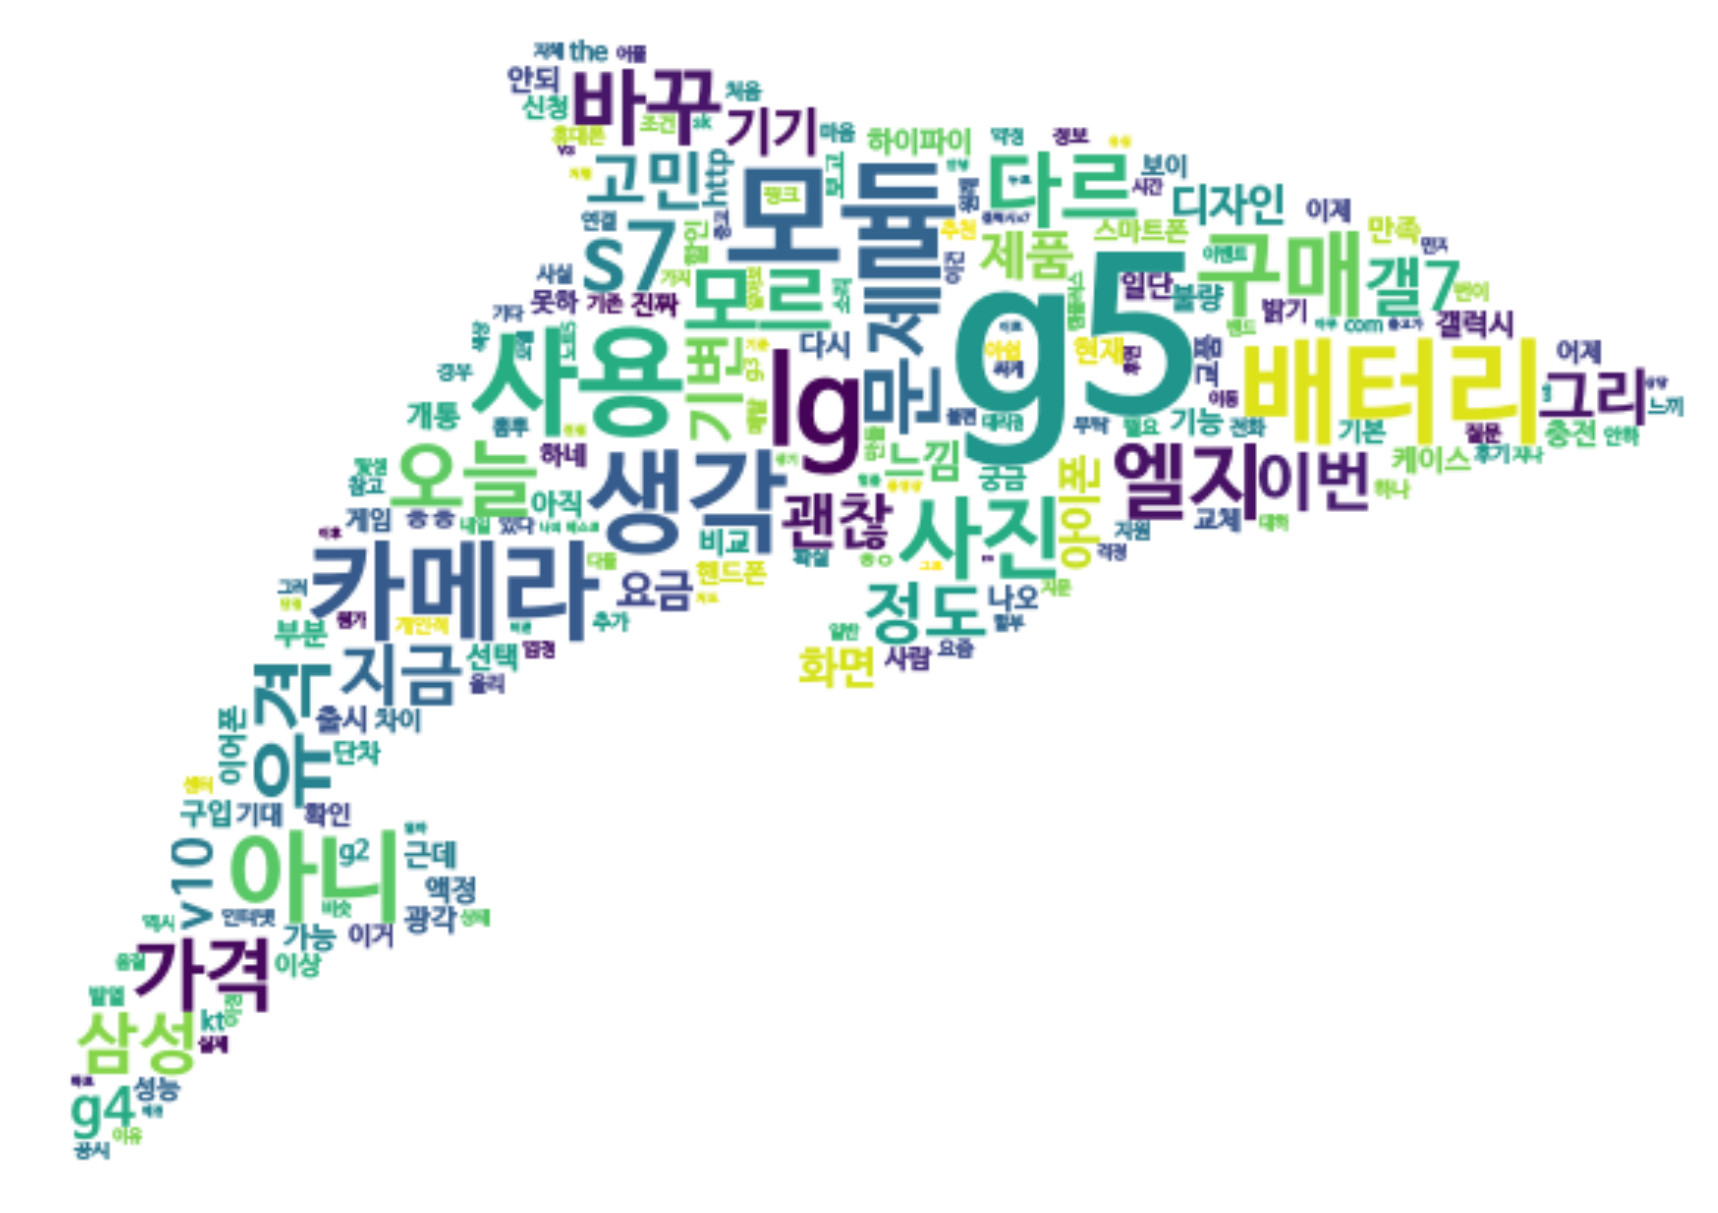

In [16]:
# use Korean font, set mask image
font_path = 'C:/Windows/Fonts/NanumBarunGothicBold.otf'
mask_image = np.array(Image.open('D:/Document/project/HYStudy/scripts/[HYStudy 17th] mask_image.jpg'))

# Generate a word cloud image and display
wordcloud = WordCloud(max_font_size=72,
                      font_path=font_path,
                      background_color='white',
                      mask=mask_image).generate_from_frequencies(tf_word_dict)

plt.figure(figsize=(30, 90))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()